# Quantum Quake 2.0

# ![Quantum Quake 2.0](./files/QQ2.jpeg)

In [1]:
''' 
Create a virtual environment First
Run the follow command to install all library:
    pip install requirements.txt -r
Set up the kernel as the virtual environment
'''

# Import necessary components from Qiskit
import qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.visualization.bloch import Bloch

import random as rd

### Test the libraries are properly working

qiskit version: 2.1.2


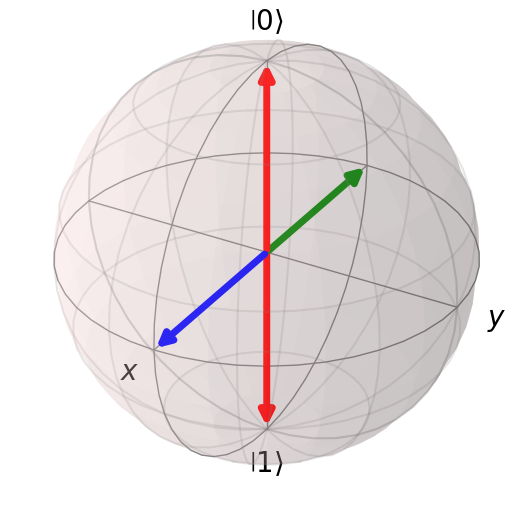

In [2]:
print("qiskit version:",qiskit.__version__)
bloch = Bloch()
bloch.vector_color = ['red', 'red', 'blue', 'green']

sv = []
sv.append([0,0,1])  # |0> in red
sv.append([0,0,-1]) # |1> in red
sv.append([1,0,0])  # |+> in blue
sv.append([-1,0,0]) # |-> in green

bloch.add_vectors(sv)
bloch.render()

In [3]:
# helper.py must be there, its an important file.
from helper import MESSAGE_BITS, POSSIBLE_BASES, EMPTY, SMALL_KEY_LENGTH, MAX_KEY_LENGTH, SIMULATOR_METHOD
from helper import generate_random_bits, Generate_random_bases, encryption_decryption

#### Resources:
1) [Simulation for understanding B92](https://www.st-andrews.ac.uk/physics/quvis/simulations_html5/sims/cryptography-b92/B92_photons.html)
2) [B92 protocol Experiment](https://www.rri.res.in/quic/qkdactivities.php)
3) [fundamentals of OKD](https://medium.com/@qcgiitr/fundamentals-of-quantum-key-distribution-bb84-b92-e91-protocols-e1373b683ead)

🔹 B92
- Uses two non-orthogonal states, impossible to distinguish perfectly.
- Eve’s measurement introduces detectable errors.
- No-cloning theorem ensures states cannot be duplicated.

### Mission Objective:
- Implement the B92 Quantum Key Distribution protocol in this Jupyter notebook using Qiskit. 
- Ensure that Agent A and Agent B successfully exchange a secret quantum key.

In [4]:
# We are going to send a binary message
print(f"Message contains: {MESSAGE_BITS}")
print(f"EMPTY value: {EMPTY}")

# In the B92 Protocol, We use two basis for the encryption and measurement
print(f"Used_bases: {POSSIBLE_BASES}")  # Horizontal (H) for 0 or 90 deg, Diagonal (D) for + or -45 deg

Message contains: (0, 1)
EMPTY value: -1
Used_bases: ['H', 'D']


Let us first generate a random message for Agent A

In [5]:
# Thus we need to generate a key for encryption
key_length = SMALL_KEY_LENGTH  # Length of the key you want to generate

# Generate Agent Alice's random bits of key
alice_bits = generate_random_bits(key_length)

print(f"Bits: {alice_bits}")

Bits: [1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1]


#### TASK 1
Prepare the states for Agent Alice based on the B92 protocol.
- *Basis:* H, D (not to confuse with gates !)
- 0 bit -> H (|0>)
- 1 bit -> D (|+>) = 1/√2 (|0> + |1>)

In [6]:
####  TASK 1  ####
# Convert the classical bit to Qubits depending on the above scheme

def prepare_states(bits, key_length):
    qc = QuantumCircuit(key_length)  # Create a quantum circuit with qubits and classical bits
    for i, bit in enumerate(bits):
        ####  Code goes Here  ####
        if(bit):
            qc.h(i)
        pass
    return qc

# Prepare Agent Alice's quantum states
alice_qc = prepare_states(alice_bits, key_length)
alice_qc.barrier()
alice_qc.draw() # use keyword output="mpl" for colors

┌───┐ ░ 
 q_0: ┤ H ├─░─
      ├───┤ ░ 
 q_1: ┤ H ├─░─
      └───┘ ░ 
 q_2: ──────░─
            ░ 
 q_3: ──────░─
      ┌───┐ ░ 
 q_4: ┤ H ├─░─
      └───┘ ░ 
 q_5: ──────░─
      ┌───┐ ░ 
 q_6: ┤ H ├─░─
      ├───┤ ░ 
 q_7: ┤ H ├─░─
      ├───┤ ░ 
 q_8: ┤ H ├─░─
      └───┘ ░ 
 q_9: ──────░─
            ░ 
q_10: ──────░─
      ┌───┐ ░ 
q_11: ┤ H ├─░─
      ├───┤ ░ 
q_12: ┤ H ├─░─
      ├───┤ ░ 
q_13: ┤ H ├─░─
      ├───┤ ░ 
q_14: ┤ H ├─░─
      ├───┤ ░ 
q_15: ┤ H ├─░─
      └───┘ ░

Now that Agent A has already set up her states, Agent B is ready to receive them.\
Agent B has picked random Bases for the measurements.

In [7]:
# Generate Bob's random bases
bob_bases = Generate_random_bases(key_length)
print("Agent Bob's bases: ", bob_bases)

Agent Bob's bases:  ['H', 'D', 'H', 'D', 'H', 'D', 'D', 'D', 'D', 'H', 'H', 'D', 'D', 'H', 'H', 'H']


#### TASK 2
Qiskit by default does measurements along Z-axis (computational).\
However, we want the measurements along |1> and |->. Prepare the measurement Bases for Agent Bob.\
You only need to code for the Basis |-> measurement.

- *Basis:* H, D (not to confuse with gates !)
- H -> Z-axis (|0>, |1>)
- D -> X-axis (|+>, |->)

*Hint: Use quantum gate transformations.*

In [8]:
####  TASK 2  ####
# Setup the measurement for D Bases for Agent Bob

def measure_states(qc: QuantumCircuit, bases):
    for i, basis in enumerate(bases):
        ####  Code goes Here  ####
        if(basis == POSSIBLE_BASES[1]):
            qc.h(i)
        pass
    
    # Measure all qubits (adds a barrier)
    qc = qc.measure_all(inplace= False) # type: ignore
    return qc

# Set up Agent Bob's measurements
bob_qc = measure_states(alice_qc, bob_bases)
bob_qc.draw()

┌───┐ ░       ░ ┌─┐                                             
    q_0: ┤ H ├─░───────░─┤M├─────────────────────────────────────────────
         ├───┤ ░ ┌───┐ ░ └╥┘┌─┐                                          
    q_1: ┤ H ├─░─┤ H ├─░──╫─┤M├──────────────────────────────────────────
         └───┘ ░ └───┘ ░  ║ └╥┘┌─┐                                       
    q_2: ──────░───────░──╫──╫─┤M├───────────────────────────────────────
               ░ ┌───┐ ░  ║  ║ └╥┘┌─┐                                    
    q_3: ──────░─┤ H ├─░──╫──╫──╫─┤M├────────────────────────────────────
         ┌───┐ ░ └───┘ ░  ║  ║  ║ └╥┘┌─┐                                 
    q_4: ┤ H ├─░───────░──╫──╫──╫──╫─┤M├─────────────────────────────────
         └───┘ ░ ┌───┐ ░  ║  ║  ║  ║ └╥┘┌─┐                              
    q_5: ──────░─┤ H ├─░──╫──╫──╫──╫──╫─┤M├──────────────────────────────
         ┌───┐ ░ ├───┤ ░  ║  ║  ║  ║  ║ └╥┘┌─┐                           
    q_6: ┤ H ├─░─┤ H ├─░──╫──╫──╫──╫──╫──╫─┤M├───────────────────────────
         ├───┤ ░ ├───┤ ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐                        
    q_7: ┤ H ├─░─┤ H ├─░──╫──╫──╫──╫──╫──╫──╫─┤M├────────────────────────
         ├───┤ ░ ├───┤ ░  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐                     
    q_8: ┤ H ├─░─┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫─┤M├─────────────────────
         └───┘ ░ └───┘ ░  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐                  
    q_9: ──────░───────░──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├──────────────────
               ░       ░  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐               
   q_10: ──────░───────░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├───────────────
         ┌───┐ ░ ┌───┐ ░  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐            
   q_11: ┤ H ├─░─┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├────────────
         ├───┤ ░ ├───┤ ░  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐         
   q_12: ┤ H ├─░─┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├─────────
         ├───┤ ░ └───┘ ░  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐      
   q_13: ┤ H ├─░───────░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├──────
         ├───┤ ░       ░  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐   
   q_14: ┤ H ├─░───────░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├───
         ├───┤ ░       ░  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
   q_15: ┤ H ├─░───────░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├
         └───┘ ░       ░  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 16/═════════════════╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩═
                          0  1  2  3  4  5  6  7  8  9  10 11 12 13 14 15

Good, Message received and Measured. Time to get the actual data, Agent.\
Next up, we need to find the matched key bits.

Measurement results: {'0100000000110000': 4, '1100000000110001': 8, '1100000000111000': 10, '1110000000100001': 7, '1100000000000000': 9, '0000000000111000': 12, '0100000000101000': 7, '1100000000010000': 6, '0000000000011001': 12, '1000000000011001': 8, '1010000000110000': 9, '1110000000010001': 6, '1000000000110000': 11, '1010000000111000': 10, '1000000000010001': 5, '0010000000000000': 3, '0000000000101000': 6, '1100000000100001': 8, '0100000000011001': 15, '1000000000010000': 5, '1010000000111001': 13, '1000000000100000': 9, '0110000000101000': 7, '0000000000110001': 13, '0000000000100001': 12, '0010000000001001': 9, '1100000000010001': 12, '0000000000011000': 8, '1000000000101001': 5, '1010000000000000': 4, '0000000000001001': 7, '0010000000110000': 11, '1000000000001001': 9, '0010000000100001': 11, '0000000000110000': 9, '0110000000101001': 7, '0010000000011000': 8, '0110000000111000': 9, '0000000000010000': 10, '1100000000011001': 8, '1110000000110000': 7, '0110000000011000': 12

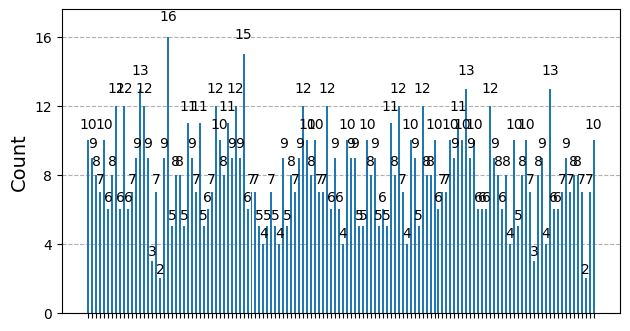

In [9]:
# Simulate the circuit using AerSimulator
def Qsimulator(qc, msg = False):
   # choose one depending on your system or leave default
   simulator = AerSimulator(method= SIMULATOR_METHOD)

   # For execution (This is latest version only qiskit v1.4)
   transpiled_qc = transpile(qc, simulator)  # Transpile the circuit for the simulator
   sim_result = simulator.run(transpiled_qc).result()

   # Agent Bob's measurements simulation
   counts = sim_result.get_counts()
   if(msg):
      print("Measurement results:", counts)
   
   return counts

counts = Qsimulator(bob_qc, True)
# To Check how many key strings generated with frequency
# plot_histogram(counts)

####  Special plot  ####
fig = plot_histogram(counts)
if isinstance(fig, tuple): # handles cases where fig is a tuple (fig, ax)
   ax = fig[1]
else:
   ax = fig.gca()
ax.set_xticklabels([]) # Remove x-axis labels
fig

#### TASK 3
With the simulations here, you need to pick which key string are you going to choose Agent.\
We leave the choice upto to you. A good choice of key string can mean more matches.

*Hint: You need to pick only one key string.*

In [10]:
####  TASK 3  ####
# Convert counts to Bob's measurement results

# Get the only 1 bitstring from the count's keys
def pick_string(count_keys):
    ####  Code goes Here  ####
    return count_keys[0]
    pass

# Convert the key string back to bits
bob_string = pick_string(list(counts.keys()))
bob_bits = [int(bit) for bit in bob_string[::-1]]   # qiskit orders q0q1q2...

#### TASK 4
You have picked a bit string Agent.\
Well, go for the next stage, try to use the B92 protocol and infer from your bases and the bit string.\
A correct inference will lead to success. Try to infer the bit's positions which are guaranteed 1 or 0.\
You can try to use the resources to find a table consisting of all combination of possibilities.

In [11]:
####  TASK 4  ####
# Record the positions where Agent B can say with confidence which bits Agent A sent depending on basis
bit_positions = [] # put 0 or 1 on the indexes where you can say for guarantee

# Also, store those indexes
unity_index = []

def infer_bits(bits, bases, key_length):
    u_index, bit_pos = [], list([EMPTY] * key_length)

    for i, bit in enumerate(bits):
        base = bases[i]
        ####  Code goes Here  ####
        if(bit):
            bit_pos[i] = 0 if (base == 'D') else 1
            u_index.append(i)
    return u_index, bit_pos

# Infered key bits from measurements
unity_index, bit_positions = infer_bits(bob_bits, bob_bases, key_length)
print("Indexes where Agent B measured |1>:", unity_index)

Indexes where Agent B measured |1>: [4, 5, 14]


Alright Agent, Half way done.\
With this, let us now talk to Agent A over the public channel.\
We need to inform about where the |1> positions were measured, refer B92 protocol.

In [12]:
# Inform Agent A about the measurements of |1>
def inform_person(person_bits, unity_index):
    common_key = []
    for i in unity_index:
        common_key.append(person_bits[i])
    return common_key

# This is for a feel of how precisely, we are able to tell which bits are exact.
print("confident bits:", bit_positions)
print("Real bits:", alice_bits)

# Generate the sifted key
alice_sifted_key = inform_person(alice_bits, unity_index)

# Print the sifted key
print("Sifted Key:", alice_sifted_key)

confident bits: [-1, -1, -1, -1, 1, 0, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1]
Real bits: [1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1]
Sifted Key: [1, 0, 1]


#### TASK 5
With this, The device is ready, now we need to do an error check.\
In case, *the shifted key, comes out to be EMPTY*. Thats because of random choice and quantum noise in simulations.\
Just re-run the file till you get a non-EMPTY key.

In [13]:
####  TASK 5  ####
# Make the function which will compare the similarity between two key slices based on how many bits match

# If error exceeds tolerance, then return false, else true
# Also make sure if both lengths are equal, else its obvious fail
def low_key_error(sifted_key_part_1, sifted_key_part_2, tolerance = 0.25):
    err = 0
    if(len(sifted_key_part_1) != len(sifted_key_part_2)):
        return False

    ####  Code goes Here  ####
    for i in range(len(sifted_key_part_1)):
        if(sifted_key_part_1[i] != sifted_key_part_2[i]):
            err += 1

    # If tolerance exceeded
    if(tolerance < err / len(sifted_key_part_1)):
        return False
    return True


# The part of the key bob and Alice will make it public for checking errors
# You can change public_key_part to 1/2 if you feel your sifted keys are always less than 4 bits. default 1/4
public_key_part = 1 / 4
err_check_num = int(len(unity_index) * public_key_part)

# Generate bob's sifted key also
bob_sifted_key = inform_person(bit_positions, unity_index)
# print(bob_sifted_key)

# Part of the key has been made public and now discarded, so check for Errors
if(err_check_num > 0):
    print("Low Error in sifted keys:", low_key_error(alice_sifted_key[:err_check_num], bob_sifted_key[:err_check_num]))
else:
    print("Key too small to compare.")

Key too small to compare.


In [14]:
# Final keys
# There may be slight mismatch due to bigger Error Window given (25%)
alice_sifted_key = alice_sifted_key[err_check_num:]
bob_sifted_key = bob_sifted_key[err_check_num:]

print("Alice's key:", alice_sifted_key)
print("bob's key:", bob_sifted_key)

Alice's key: [1, 0, 1]
bob's key: [1, 0, 1]


### Mission complete
Well done, Agent. Time for field testing.

### New Mission Objective:
- Help Agent A and Agent B communicate the below message
- Encrypt and Decrypt using the key

In [15]:
# This Agent Alice's message
important_message = "Eve mole"

In [16]:
# A message to bits encryption and decryption protocol
# This return None on invalid values and on valid values returns a list of encrypted bits or string after decryption
sample_key = [1,0,1]

# Change the sample key to see the effect on sample bits
sample_bits = encryption_decryption("I am Quantum", sample_key)

print(sample_bits)
print("Decrypted message:", encryption_decryption(sample_bits, sample_key, "decryption"))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Decrypted message: I am Quantum


#### TASK 6
Complete the full implementation for the QKD B92.

In [17]:
####  TASK 6  ####
# Use the below functions and make a complete encryption, decryption procedure
key_length = MAX_KEY_LENGTH

# The key loop
def generate_key_pair(trials):
    global alice_sifted_key, bob_sifted_key, t
    alice_sifted_key, bob_sifted_key, t = [0], [1], 0

    while(alice_sifted_key != bob_sifted_key and t < trials):
        # Generate the random bits for the key.

        ####  Code goes Here  ####
        alice_bits = generate_random_bits(key_length)
        alice_qc = prepare_states(alice_bits, key_length)

        # print(alice_bits)

        bob_bases = Generate_random_bases(key_length)

        # Hand over the states from Agent Alice to Agent Bob for measurement
        bob_qc = measure_states(alice_qc, bob_bases)
        counts = Qsimulator(bob_qc)

        ####  Code goes Here  ####
        bob_string = list(counts.keys())[0]
        bob_bits = [int(bit) for bit in bob_string[::-1]]

        #print(bob_bases, len(bob_bases))
        #print(bob_bits, len(bob_bits))

        ####  Code goes Here  ####
        unity_index, bit_positions = infer_bits(bob_bits, bob_bases, key_length)

        alice_sifted_key = inform_person(alice_bits, unity_index)
        bob_sifted_key = inform_person(bit_positions, unity_index)

        err_check_num = int(len(unity_index) * public_key_part)

        # Part of the key has been made public and now discarded, so check for Errors
        if(err_check_num > 0 and 2 * err_check_num < len(unity_index)):
            err_val = low_key_error(alice_sifted_key[:err_check_num], bob_sifted_key[:err_check_num])
            print("Low Error in sifted keys:", err_val)
        else:
            print("Key too small to compare.")
            t += 1
            continue

        ####  Code goes Here  ####
        alice_sifted_key = alice_sifted_key[err_check_num:]
        bob_sifted_key = bob_sifted_key[err_check_num:]
        t += 1

# Number of trials to make for making key pair
trials = 10
generate_key_pair(trials= trials)
print(f"Trials taken to generate key: {t} / {trials}")
print("Alice key", alice_sifted_key)
print("Bob key", bob_sifted_key)

Low Error in sifted keys: True
Trials taken to generate key: 1 / 10
Alice key [0, 0, 0, 1, 0, 1, 1, 0, 1, 1]
Bob key [0, 0, 0, 1, 0, 1, 1, 0, 1, 1]


In [18]:
# For message transmission
print("Alice sent:", important_message)

# Alice encrypts using her key
encrypted_message = encryption_decryption(important_message, alice_sifted_key)

print("Encrypted binary message:", encrypted_message)

# Hand over the message over public communication
# Bob decrypts using his key
decrypted_message = encryption_decryption(encrypted_message, bob_sifted_key, "decryption")
print("Bob reads:", decrypted_message)

Alice sent: Eve mole
Encrypted binary message: [0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0]
Bob reads: Eve mole


### *Optional* Mission Objective:
- Find if Agent E (a mole) was intercepting the message or not.
- Implement the B92 Quantum Key Distribution's Error / intercepted protocol. 
- Ensure that Agent E gets detected.

In [19]:
def interception(qc: QuantumCircuit, key_length):
    # Eve chooses only 'H' or 'D' basis for interception
    eve_bases = [rd.choice(POSSIBLE_BASES)] * key_length
    eve_qc = measure_states(qc, eve_bases)

    # Simulate the message reading
    counts = Qsimulator(eve_qc)
    bit_string = [key for key in counts if counts[key] == max(counts.values())][0]

    # Get the eve bits
    eve_bits = [int(bit) for bit in bit_string[::-1]]
    # print(eve_bits)

    _, bit_positions = infer_bits(eve_bits, eve_bases, key_length)
    eve_index = [i for i in bit_positions]
    # print(eve_index)

    # Since eve has measured the states, she will need to create a new state so that bob gets the states
    eve_qc = QuantumCircuit(key_length)

    # For case 'H'
    for i, bit in enumerate(eve_index):
        if(bit == EMPTY):
            # Assigns random bits for non-confident places
            if(rd.randint(0,1)):
                eve_qc.h(i)
        elif(bit == 1):
            eve_qc.h(i)

    return eve_qc, eve_index

In [20]:
# We will check for the intercepted message only once and see we can detect Agent E intercepting the message
alice_sifted_key, bob_sifted_key, eve_sifted_key = [], [], []
key_length = MAX_KEY_LENGTH

# Same process of key
alice_bits = generate_random_bits(key_length)
alice_qc = prepare_states(alice_bits, key_length)

# Hand over the states over public channel
# Agent E intercepts the message or maybe not
intercepted_qc = alice_qc

# Random chance of interception
if(rd.randint(0,5) > 3):
    intercepted_qc, eve_sifted_key = interception(alice_qc, key_length)

# Agent Bob gets the intercepted states
bob_bases = Generate_random_bases(key_length)
bob_qc = measure_states(intercepted_qc, bob_bases)

# Agent B doesn't know yet message has been intercepted
counts = Qsimulator(bob_qc)

bob_string = pick_string(list(counts.keys()))
bob_bits = [int(bit) for bit in bob_string[::-1]]

unity_index, bit_positions = infer_bits(bob_bits, bob_bases, key_length)

alice_sifted_key = inform_person(alice_bits, unity_index)
bob_sifted_key = inform_person(bit_positions, unity_index)

err_check_num = int(len(unity_index) * public_key_part)

# Part of the key has been made public and now discarded, so check for Errors
if(err_check_num > 0 and 2 * err_check_num < len(unity_index)):
    err_val = low_key_error(alice_sifted_key[:err_check_num], bob_sifted_key[:err_check_num], tolerance= 0.05)
    print("Low Error in sifted keys:", err_val)
    
    # If err_val goes false
    ####  Code goes here  ####
    if(not err_val):
        print("Agent E detected!")
else:
    print("Key too small to compare.")

alice_sifted_key = alice_sifted_key[err_check_num:]
bob_sifted_key = bob_sifted_key[err_check_num:]

if(alice_sifted_key != bob_sifted_key):
    print("\nKey mismatch!")
print("Agent Alice key", alice_sifted_key)
print("Agent Bob key", bob_sifted_key)

Low Error in sifted keys: True
Agent Alice key [0, 1, 1, 1, 1, 0, 0, 1]
Agent Bob key [0, 1, 1, 1, 1, 0, 0, 1]


#### *For any doubts contact admin first.*
- Notebook by Anshurup gupta\
[email: anshurup_2301ai02@iitp.ac.in](mailto:anshurup_2301ai02@iitp.ac.in)

- QTC, IIT Patna ©2025